# Support Vector Machines Part 1

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import svm
from sklearn import preprocessing

In [2]:
%config InlineBackend.figure_formats = ['svg']

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

cmap= mpl.colors.ListedColormap(['red', 'black', 'blue'])

## Task 1 Decision Boundary from a Maximal Margin Classifier (6 points)
Let's create some synthetic data with two classes:

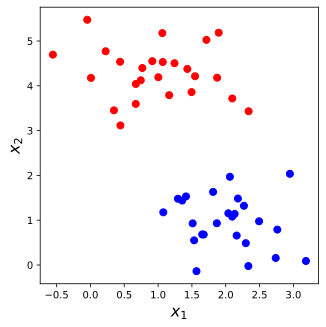

In [3]:
X, y = datasets.make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

y[np.where(y==0)] = -1

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)

ax.set_xlabel(r'$x_1$', fontsize=16)
ax.set_ylabel(r'$x_2$', fontsize=16)

plt.show()

In this task we will use the `SVC` model of `sklearn.svm` with a `kernel=linear` and large parameter `C`. `sklearn`'s module `svm` has implementations of several Support Vector Machine algorithms. Some are meant to solve Regression, some - Classification problems. `LinearSVC` stands for Linear Support Vector Classification which is exactly what we need in order to solve the maximal margin classification problem. However, `svm.SVC` offers more flexibility in order to extract the learned parameters etc.

In [4]:
model = svm.SVC(kernel='linear', C=1000, tol=0.0001) # initialize the model
model.fit(X, y) # fit the model = learn the decision boundaries

SVC(C=1000, kernel='linear', tol=0.0001)

When the optimisation has completed, you can access the parameters of the separating hyperplane. The vector $\mathbf{w}$:

In [5]:
model.coef_

array([[ 0.2354745 , -1.41254898]])

The $b$:

In [6]:
model.intercept_

array([3.2961071])

The indices of the support vectors:

In [7]:
model.support_

array([18, 25,  7])

So you can slice $\mathbf{X}$ for the corresponding coordinates

In [8]:
X[model.support_]

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

or get them directly:

In [9]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

**Task 1A** Calculate $y^{(m)}\left(b+w^Tx^{(m)}\right)$ for every support vector. Please explain whether the result complies with your expectation and why? 

In [12]:
constraint_values = []
for idx in model.support_:
    constraint_values.append(y[idx]*(model.intercept_+np.dot(model.coef_,X[idx])))
    
print(constraint_values)

# The distance should be the same


[array([0.99996393]), array([1.00001735]), array([0.99998206])]


## 📢 **HAND-IN** 📢: Report the calculated values and your explanation from Task 1A in Moodle

**Task 1B** Calculate the distance from the decision boundary to the support vectors, i.e. the width of the margin

In [13]:
def r(x):
    return (model.intercept_ + np.dot(model.coef_,x))/np.linalg.norm(model.coef_)

distances = []
for idx in model.support_:
    distances.append(r(X[idx]))

print(distances)
    

[array([-0.69827859]), array([-0.6983159]), array([0.69829126])]


## 📢 **HAND-IN** 📢: Report the width of the margin calculated in Task 1B in Moodle

**Task 1C** Generate a scatterplot with the data $X$, the decision boundary and the gutters like in 
https://github.zhaw.ch/pages/doem/mldm_book/06_svm.html#fig-max-margin
using the optimised parameters `model.interecept_` and `model.coef_[0]` 

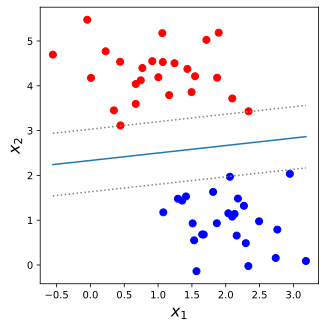

In [23]:
# fig, ax = plt.subplots(figsize=(5, 5))
# ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)

# ax.set_xlabel(r'$x_1$', fontsize=16)
# ax.set_ylabel(r'$x_2$', fontsize=16)

# # get support vectors
# w = model.coef_[0]
# b = model.intercept_[0]

# slope = -w[0] / w[1]
# intercept = -b / w[1]

# # get support vectors
# support_vectors = model.support_vectors_
# support_vector_labels = model.dual_coef_.ravel()


# x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() +1
# x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() +1
# xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
# Z = model.decision_function(np.c_[xx1.ravel(), xx2.ravel()])
# Z = Z.reshape(xx1.shape)

# # plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired, alpha=0.8)
# plt.plot(xx1, slope*xx1+intercept, 'k--')
# plt.scatter(support_vectors[:, 0], support_vectors[:, 1]) 

# plt.show()
r = distances[2]

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)

w = model.coef_[0]
xx = np.linspace(np.min(X[:,0]), np.max(X[:,0]))
yy = -w[0] / w[1] * xx - (model.intercept_[0]) / w[1]

ax.plot(xx,yy)
ax.plot(xx, yy + r, linestyle = 'dotted', color="grey")
ax.plot(xx, yy - r, linestyle = 'dotted', color="grey")
# ax.plot(model.intercept_ + model.coef_[0] * X[:,0] + model.coef_[0] * X[:,1])

ax.set_xlabel(r'$x_1$', fontsize=16)
ax.set_ylabel(r'$x_2$', fontsize=16)

plt.show()

## 📢 **HAND-IN** 📢: Upload an image-file of the plot from task 1C in Moodle

## Task 2 Large Margin Classifier on the Wine Dataset (4 points)
This dataset `sklearn.datasets.load_wine()` contains the chemical analysis of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine's chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 3 classes. What accuracy can you reach?

In [24]:
wine = datasets.load_wine(as_frame=True)
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

**TASK 2A**: Train a linear SVM on the dataset and report the accuracy

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=42)

In [26]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0


In [27]:
y_train.head()

2      0
100    1
122    1
154    2
51     0
Name: target, dtype: int32

SVC will automatically use the One-vs-All strategy, so there's nothing special we need to do to handle multiple classes.

In [35]:
model = svm.SVC(kernel='linear', C=1000, tol=0.0001, random_state=42) # initialize the model
# model.fit(X_train, y_train)
# y_predict = model.predict(X_test)

Calulate the accuracy (cross validation score):

In [36]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train).mean()

0.9176638176638177

## 📢 **HAND-IN** 📢: 
Report the accuracy that you reached in task 2A without feature scaling in Moodle

**Task 2B**: Which accuracy (cross validation score) can you reach when you standarize the features before training?  
See https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new = scaler.fit_transform(X_train)

In [38]:
cross_val_score(model, X_new, y_train).mean()

0.9772079772079773

## 📢 **HAND-IN** 📢: Report the accuracy that you reached with feature standaridsation in Task 2B in Moodle